In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/UCMF_limpo.csv')
data.index = data['ID']
data = data.drop('ID', axis=1)

In [2]:
data.head()

,IMC,IDADE,PULSOS,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
ID,,,,,,,,,,,,,
1,19.0,0.12,Normais,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,Palpitacao,Masculino,Grupo 6,Grupo 6
2,14.0,0.02,Normais,Não Calculado,Anormal,Normal,Ausente,128,Dispneia,Palpitacao,Masculino,Grupo 6,Grupo 6
3,16.0,0.01,Normais,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,Palpitacao,Masculino,Grupo 2,Grupo 5
4,19.0,0.50,Normais,Não Calculado,Anormal,Normal,Ausente,92,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5
5,20.0,9.60,Normais,Normal,Anormal,Normal,Ausente,90,Assintomático,Palpitacao,Masculino,Grupo 5,Grupo 5


In [3]:
# Procura por valores nulos

data.isna().sum()

IMC                 0
IDADE               0
PULSOS              0
PPA                 0
NORMAL X ANORMAL    0
B2                  0
SOPRO               0
FC                  0
HDA 1               0
HDA2                0
SEXO                0
MOTIVO1             0
MOTIVO2             0
dtype: int64

In [4]:
# Verifica se há valores duplicados

data.duplicated().sum()

0

In [5]:
data.shape

(15843, 13)

# Transformação dos Dados

### Dados Quantitativos Discretos

#### Variável FC

Repare que o FC está como string, mas isso é porque alguns de seus valores são intervalos em vez de um valor discreto próprio. Vamos pegar a média desse intervalo como valor para abstrair todos as observações dessa variável como um dado discreto.

In [6]:
def pega_media(intervalo):
    valores = intervalo.split('-')
    
    if len(valores) == 1:
        aux = valores[0].split(' a ')
        if len(aux) > 1:
            valores = aux
        else:
            return int(valores[0])
    
    valores = [int(x) for x in valores]
    
    return (valores[0] + valores[1]) / 2

In [7]:
# Aplica a função de média para as colunas de intervalo

data['FC'] = data['FC'].apply(pega_media)

In [8]:
data['FC'].describe()

count    15843.000000
mean        92.912296
std        100.318831
min          8.000000
25%         80.000000
50%         90.000000
75%        100.000000
max       9288.000000
Name: FC, dtype: float64

Agora podemos visualizar melhor a existência de outliers nesse conjunto de observações. Vamos substituir os outliers pela nossa moda.

<Axes: ylabel='FC'>

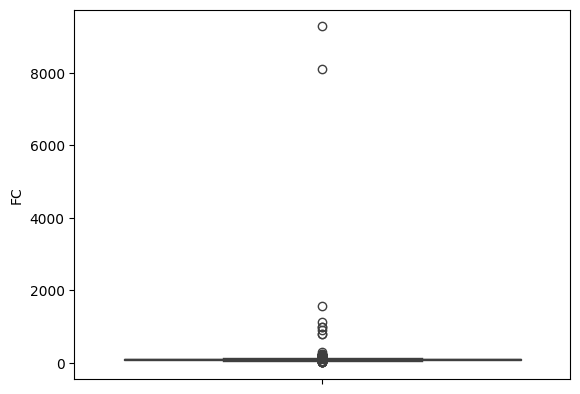

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data['FC'])

In [10]:
# Substitui os valores fora do intervalo de 40 a 300 pela moda

moda = data['FC'].mode()[0]
data['FC'] = data['FC'].apply(lambda x: x if 40 <= x <= 300 else moda)

<Axes: xlabel='FC', ylabel='Count'>

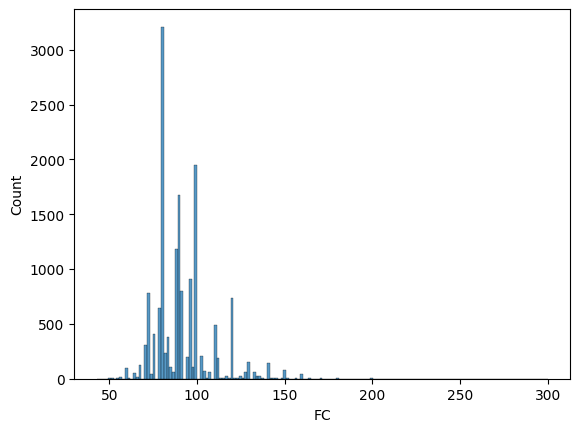

In [11]:
sns.histplot(data['FC'])

Além dessa transformação, vamos aplicar uma transformação logarítmica para reduzir o impacto dos outliers que não são erros.

<Axes: xlabel='FC', ylabel='Count'>

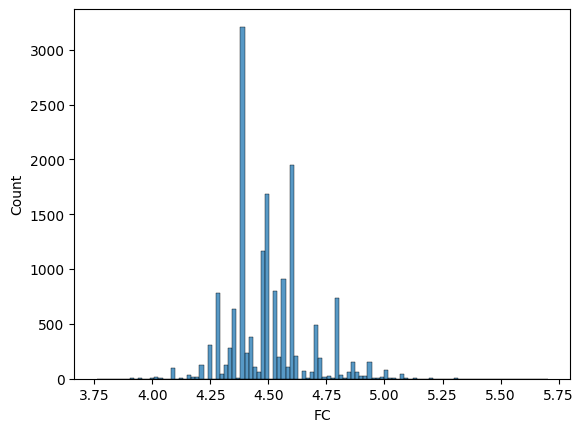

In [12]:
# Aplica transformação logarítmica em FC

data['FC'] = np.log(data['FC'])

sns.histplot(data['FC'])

In [13]:
data.shape

(15843, 13)

#### Variável Idade

Apesar de estar representada como um número flutuante, isso deve se dar pela precisão de meses e dias. Se transformarmos para dias, ainda vamos manter a qualidade de ser um dado discreto.

In [14]:
data['IDADE'].describe()

count    15843.000000
mean         6.058433
std          4.696743
min          0.000000
25%          1.840000
50%          5.410000
75%          9.780000
max         18.910000
Name: IDADE, dtype: float64

<Axes: ylabel='IDADE'>

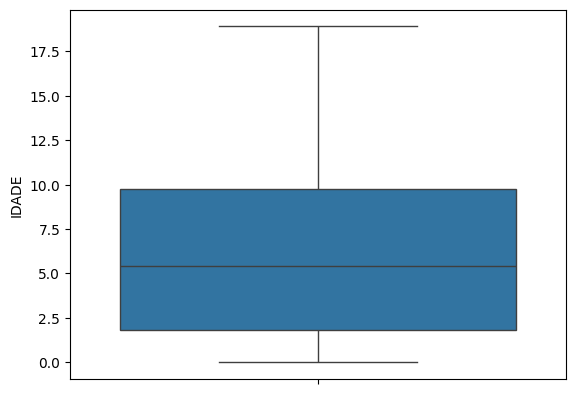

In [15]:
sns.boxplot(data['IDADE'])

<Axes: xlabel='IDADE', ylabel='Count'>

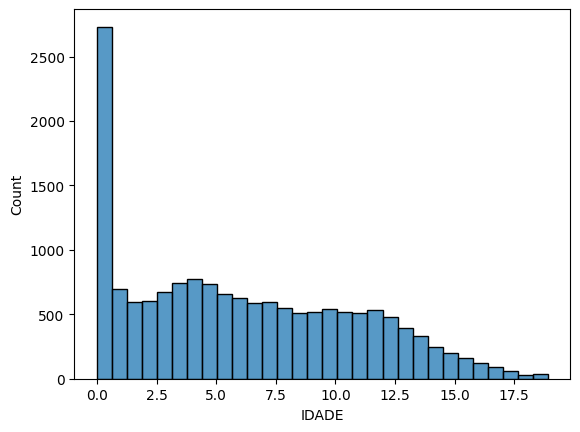

In [16]:
sns.histplot(data['IDADE'])

Vamos aplicar uma transformação logarítmica para eliminar essa concentração de valores próximos de 0 e compactar mais esse gráfico.

<Axes: xlabel='IDADE', ylabel='Count'>

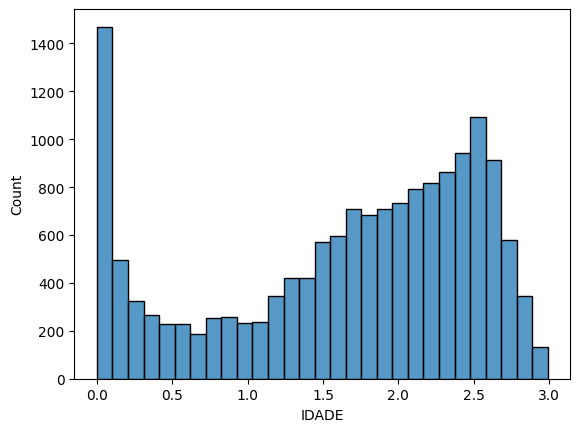

In [17]:
# Aplica transformação logarítmica em IDADE

data['IDADE'] = np.log(data['IDADE'] + 1) # Somamos +1 para evitar log(0)

sns.histplot(data['IDADE'])

In [18]:
data.shape

(15843, 13)

### Dados Quantitativos Contínuos

#### Variável IMC

No IMC temos a informação já abstraída de altura e peso, correlacionados. Como é fruto de uma medição, tratarei como um dado quantitativo contínuo.

<Axes: ylabel='IMC'>

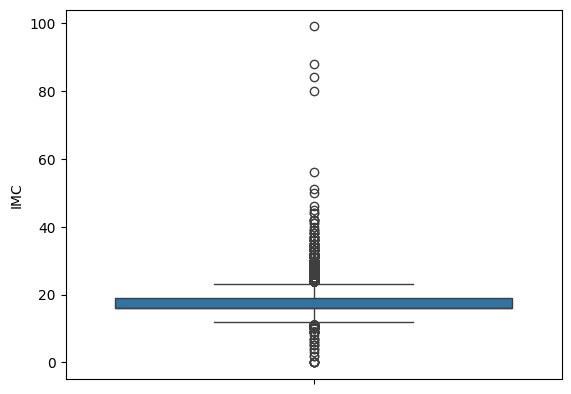

In [19]:
sns.boxplot(data['IMC'])

<Axes: xlabel='IMC', ylabel='Count'>

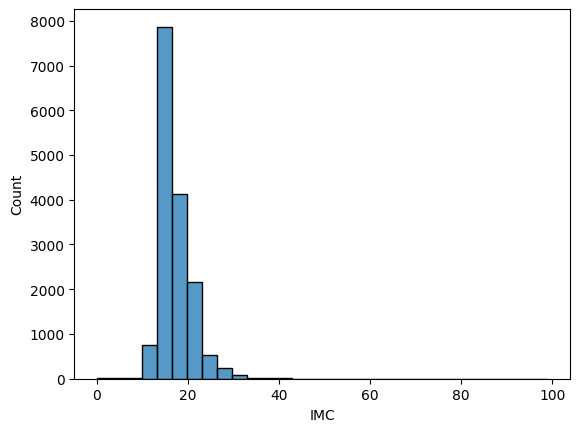

In [20]:
sns.histplot(data['IMC'], bins=30)

Como podemos observar, se aplicarmos transformação logarítmica cairemos em valores negativos para os dados entre 0 e 1. Para a redução de valores nesse caso irei aplicar raiz quadrada no conjunto de dados, apesar de normalmente ser utilizada para contagem. Dessa forma, o intervalo de 0-100 será reduzido para 0-10.

<Axes: xlabel='IMC', ylabel='Count'>

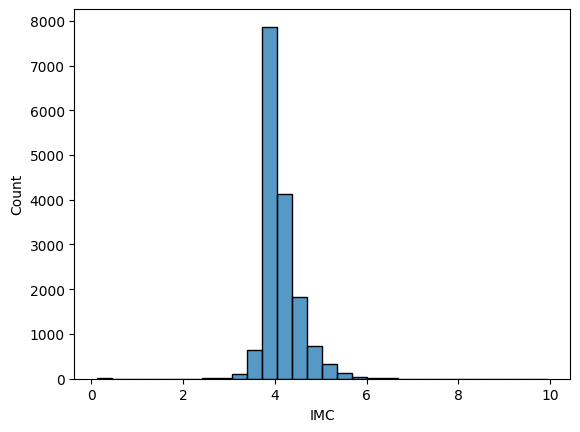

In [21]:
# Aplica transformação de raiz cúbica em IMC

data['IMC'] = np.sqrt(data['IMC'])

sns.histplot(data['IMC'], bins=30)

In [22]:
data['IMC'].describe()

count    15843.000000
mean         4.150636
std          0.403049
min          0.125310
25%          4.000000
50%          4.000000
75%          4.358899
max          9.949874
Name: IMC, dtype: float64

In [23]:
data.shape

(15843, 13)

### Dados Qualitativos Ordinais

#### Variáveis HDA 1 e HDA 2

Vamos antes mudar o nome da coluna "HDA 1" para "HDA1", afim de facilitar o trabalho depois.

In [24]:
# Muda o nome da coluna "HDA 1" para "HDA1" 

data = data.rename(columns={'HDA 1': 'HDA1'})

In [25]:
print(data['HDA1'].unique())
print()
print(data['HDA2'].unique())

['Palpitacao' 'Dispneia' 'Assintomático' 'Dor precordial'
 'Desmaio/tontura' 'Outro' 'Cianose' 'Ganho de peso']

['Palpitacao' 'Dispneia' 'Desmaio/tontura' 'Ganho de peso' 'Outro'
 'Dor precordial' 'Assintomático' 'Cianose']


Apesar de ser um histórico, pode se traçar uma hierarquia entre esses valores dada à urgência de cada um. Portanto, vamos tratar esses dados como qualitativos ordinais.

In [26]:
# Importando a função de transformação ordinal do scikit-learn
from sklearn.preprocessing import OrdinalEncoder

ordem = ['Assintomático', 'Palpitacao', 'Dor precordial', 'Ganho de peso', 
         'Dispneia', 'Desmaio/tontura', 'Cianose', 'Outro']

encoder = OrdinalEncoder(categories=[ordem])

# Aplica a transformação ordinal nas colunas HDA1 e HDA2
data['HDA1'] = encoder.fit_transform(data['HDA1'].values.reshape(-1, 1))
data['HDA2'] = encoder.fit_transform(data['HDA2'].values.reshape(-1, 1))

<Axes: xlabel='HDA1', ylabel='Count'>

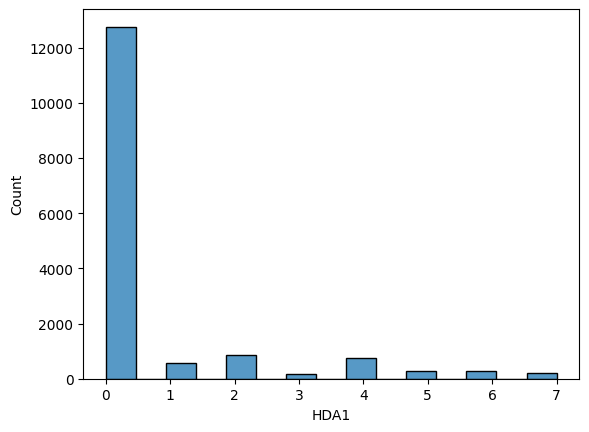

In [27]:
sns.histplot(data['HDA1'])

<Axes: xlabel='HDA2', ylabel='Count'>

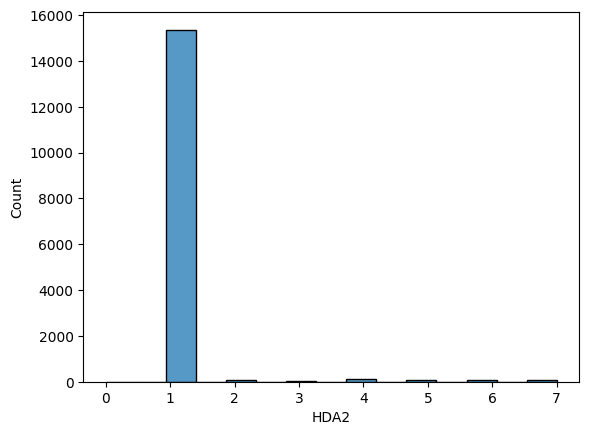

In [28]:
sns.histplot(data['HDA2'])

In [29]:
data.shape

(15843, 13)

#### Variável PPA

A pressão arterial apresenta uma relação de hierarquia, por isso consideramos como dado ordinal. Quanto maior o valor da pressão, seja sistólica ou diastólica, mais danoso é pra todos os órgãos do corpo e ambas, seja sistólica ou diastólica, são parâmetro p/ hipertensão arterial. Algumas pessoas são hipertensas só às custas da sistólica, outras só da diastólica, outras de ambas. Portanto, tratarem a hipertensão PAS e PAD como no mesmo nível, para facilitar a análise.

In [30]:
data['PPA'].unique()

array(['Não Calculado', 'Normal', 'Pre-Hipertensão PAS', 'HAS-2 PAS',
       'Pre-Hipertensão PAD', 'HAS-1 PAS', 'HAS-2 PAD', 'HAS-1 PAD'],
      dtype=object)

In [31]:
# Substitui os valores de "Pre-Hipertensão PAS" e "Pre-Hipertensão PAD" por "Pre-Hipertensão"
data['PPA'] = data['PPA'].apply(lambda x: 'Pre-Hipertensão' if 'Pre-Hipertensão' in x else x)

# Substitui os valores de "HAS-1 PAS" e "HAS-1 PAD" por "HAS-1"
data['PPA'] = data['PPA'].apply(lambda x: 'HAS-1' if 'HAS-1' in x else x)

# Substitui os valores de "HAS-2 PAS" e "HAS-2 PAD" por "HAS-2"
data['PPA'] = data['PPA'].apply(lambda x: 'HAS-2' if 'HAS-2' in x else x)

data['PPA'].unique()

array(['Não Calculado', 'Normal', 'Pre-Hipertensão', 'HAS-2', 'HAS-1'],
      dtype=object)

In [32]:
ordem = ['Normal', 'Pre-Hipertensão', 'HAS-1', 'HAS-2', 'Não Calculado']

encoder = OrdinalEncoder(categories=[ordem])

data['PPA'] = encoder.fit_transform(data['PPA'].values.reshape(-1, 1))

<Axes: xlabel='PPA', ylabel='Count'>

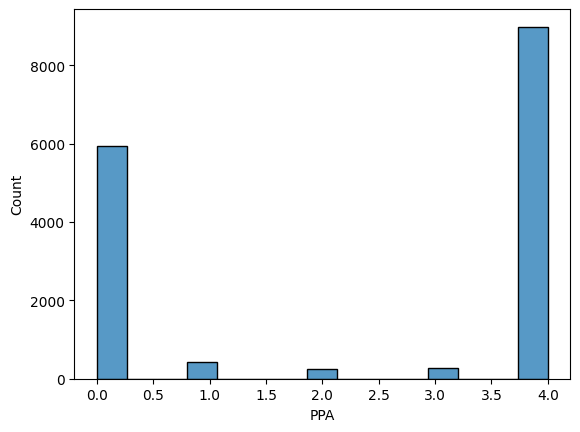

In [33]:
sns.histplot(data['PPA'])

In [34]:
data.shape

(15843, 13)

#### Variável PULSOS

Apesar de ser uma informação muito vaga, acredito que possamos criar uma relação de hierarquia para a pulsação também. Se houvesse mais informações, poderíamos ter certeza sobre isso, já que em algumas doenças (por exemplo uma trombose em veia da perna) um pulso pode estar isoladamente reduzido (por causa do trombo). Nesse caso, vou considerar que essa pulsação é geral.

In [35]:
data['PULSOS'].unique()

array(['Normais', 'Outro', 'Amplos', 'Femorais diminuidos', 'Diminuídos '],
      dtype=object)

<Axes: xlabel='PULSOS', ylabel='Count'>

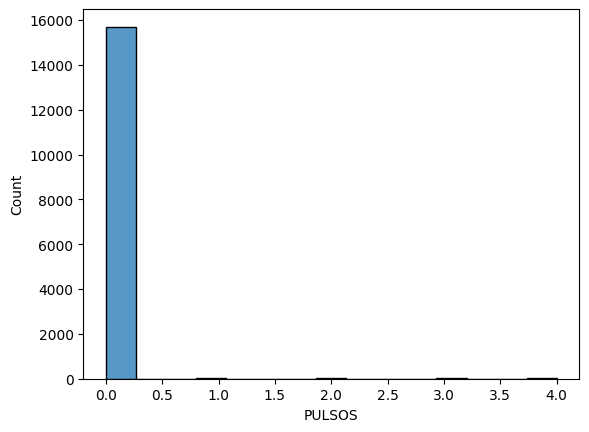

In [36]:
ordem = ['Normais', 'Amplos', 'Diminuídos ', 'Femorais diminuidos', 'Outro']

encoder = OrdinalEncoder(categories=[ordem])

data['PULSOS'] = encoder.fit_transform(data['PULSOS'].values.reshape(-1, 1))

sns.histplot(data['PULSOS'])

In [37]:
data.shape

(15843, 13)

#### Variável B2

Novamente, podemos tentar estabelecer uma relação de hierarquia.

In [38]:
data['B2'].unique()

array(['Normal', 'Desdob fixo', 'Outro', 'Hiperfonética', 'Única'],
      dtype=object)

<Axes: xlabel='B2', ylabel='Count'>

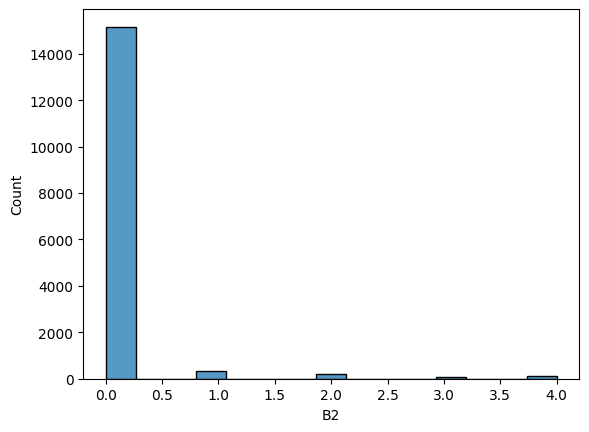

In [39]:
ordem = ['Normal', 'Hiperfonética', 'Desdob fixo', 'Única', 'Outro']

encoder = OrdinalEncoder(categories=[ordem])

data['B2'] = encoder.fit_transform(data['B2'].values.reshape(-1, 1))

sns.histplot(data['B2'])

In [40]:
data.shape

(15843, 13)

### Dados Qualitativos Nominais

#### Variável SOPRO

Para esse tipo de dado, vamos aplicar o OneHotEncoder que criará um label para cada observação única e depois faremos um pós-tratamento.

In [41]:
data['SOPRO'].unique()

array(['Sistólico', 'Ausente', 'Contínuo', 'Diastólico',
       'Sistolico e diastólico'], dtype=object)

In [42]:
data.shape

(15843, 13)

In [43]:
# Importando a função de transformação binária do scikit-learn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Aplica a transformação na coluna SOPRO
sopro = encoder.fit_transform(data['SOPRO'].values.reshape(-1, 1)).toarray()
sopro = pd.DataFrame(sopro, columns=encoder.categories_[0])
data = data.join(sopro)

data = data.drop('SOPRO', axis=1)

In [44]:
data.shape

(15843, 17)

In [45]:
data.columns

Index(['IMC', 'IDADE', 'PULSOS', 'PPA', 'NORMAL X ANORMAL', 'B2', 'FC', 'HDA1',
       'HDA2', 'SEXO', 'MOTIVO1', 'MOTIVO2', 'Ausente', 'Contínuo',
       'Diastólico', 'Sistolico e diastólico', 'Sistólico'],
      dtype='object')

Agora vamos eliminar a coluna 'Sistolico e diastólico' e marcar em cada um dos labels se 1 para 'Sistolico e diastólico' então 1 para Sistolico e 1 para Diastolico.

In [46]:
# Marca 1 para a coluna 'Diastólico' se a coluna 'Sistolico e diastólico' for 1, se não deixa o valor que estava
data.loc[data['Sistolico e diastólico'] == 1, 'Diastólico'] = 1

# Marca 1 para a coluna 'Sistólico' se a coluna 'Sistolico e diastólico' for 1, se não deixa o valor que estava
data.loc[data['Sistolico e diastólico'] == 1, 'Sistólico'] = 1

data = data.drop('Sistolico e diastólico', axis=1)

In [47]:
data.shape

(15843, 16)

In [48]:
data.columns

Index(['IMC', 'IDADE', 'PULSOS', 'PPA', 'NORMAL X ANORMAL', 'B2', 'FC', 'HDA1',
       'HDA2', 'SEXO', 'MOTIVO1', 'MOTIVO2', 'Ausente', 'Contínuo',
       'Diastólico', 'Sistólico'],
      dtype='object')

#### Variável MOTIVO1 e MOTIVO2

Vamos, também, aplicar o OneHotEncoder para essas duas variáveis.

In [49]:
print(data['MOTIVO1'].unique())
print()
print(data['MOTIVO2'].unique())

['Grupo 6' 'Grupo 2' 'Grupo 5' 'Grupo 1' 'Grupo 7']

['Grupo 6' 'Grupo 5' 'Grupo 1']


In [50]:
data.shape

(15843, 16)

In [51]:
# Aplica o OneHotEncoder nas colunas MOTIVO1 e MOTIVO2

motivo1 = encoder.fit_transform(data['MOTIVO1'].values.reshape(-1, 1)).toarray()
motivo1 = pd.DataFrame(motivo1, columns=encoder.categories_[0])
data = data.join(motivo1, lsuffix='_motivo1')

motivo2 = encoder.fit_transform(data['MOTIVO2'].values.reshape(-1, 1)).toarray()
motivo2 = pd.DataFrame(motivo2, columns=encoder.categories_[0])
data = data.join(motivo2, lsuffix='_motivo2')

data = data.drop(columns=['MOTIVO1', 'MOTIVO2'])

In [52]:
data.shape

(15843, 22)

In [53]:
data.columns

Index(['IMC', 'IDADE', 'PULSOS', 'PPA', 'NORMAL X ANORMAL', 'B2', 'FC', 'HDA1',
       'HDA2', 'SEXO', 'Ausente', 'Contínuo', 'Diastólico', 'Sistólico',
       'Grupo 1_motivo2', 'Grupo 2', 'Grupo 5_motivo2', 'Grupo 6_motivo2',
       'Grupo 7', 'Grupo 1', 'Grupo 5', 'Grupo 6'],
      dtype='object')

#### Variável SEXO

A partir de agora, vamos aplicar apenas o LabelEncoder que classifica sem ordem.

In [54]:
data['SEXO'].unique()

array(['Masculino', 'Feminino', 'Indeterminado'], dtype=object)

In [55]:
# Importando a função de transformação de scikit-learn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Aplica a transformação na coluna SEXO

data['SEXO'] = encoder.fit_transform(data['SEXO'])

data['SEXO'].unique()

array([2, 0, 1])

#### Variável NORMAL X ANORMAL

Por se tratar do nosso label, obviamente vamos aplicar o LabelEncoder.

In [56]:
data['NORMAL X ANORMAL'].unique()

array(['Anormal', 'Normal'], dtype=object)

In [57]:
encoder = LabelEncoder()

data['NORMAL X ANORMAL'] = encoder.fit_transform(data['NORMAL X ANORMAL'])

data['NORMAL X ANORMAL'].unique()

array([0, 1])

## Salvando os dados 

In [58]:
# Salva os dados como "UCMF_preprocessado.csv"

data.to_csv('data/UCMF_preprocessado.csv')